In [1]:
library(GLMsData)
library(MASS)
data(setting)

In [2]:
str(setting)

'data.frame':	13 obs. of  5 variables:
 $ A   : int  7 1 11 11 7 11 3 1 2 21 ...
 $ B   : int  26 29 56 31 52 55 71 31 54 47 ...
 $ C   : int  6 15 8 8 6 9 17 22 18 4 ...
 $ D   : int  60 52 20 47 33 22 6 44 22 26 ...
 $ Heat: num  78.5 74.3 104.3 87.6 95.9 ...


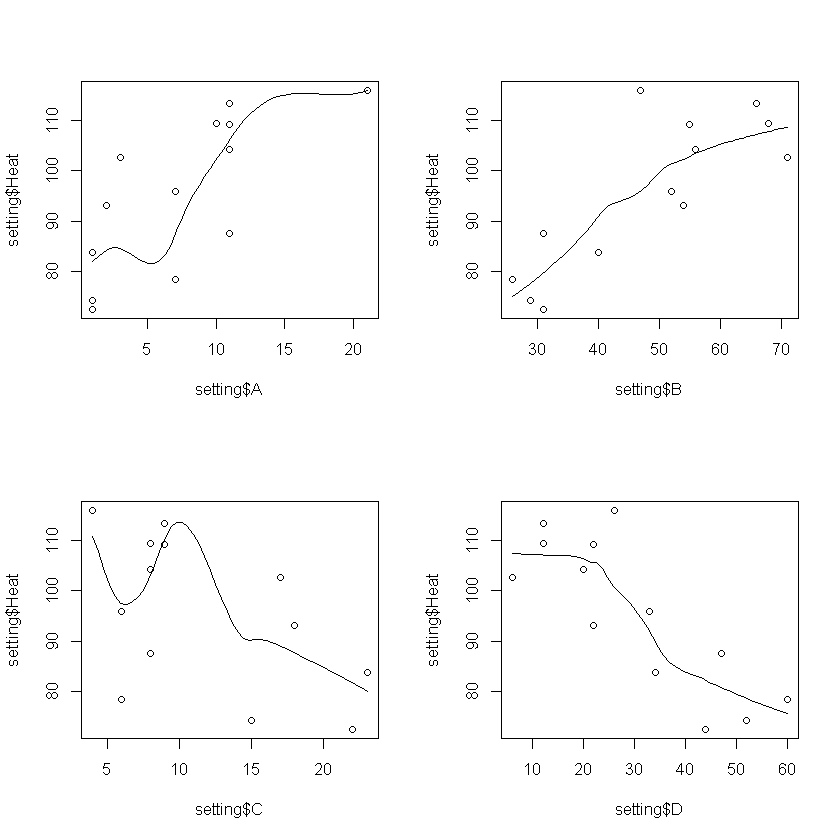

In [3]:
par(mfrow=c(2, 2))
scatter.smooth(setting$Heat ~ setting$A)
scatter.smooth(setting$Heat ~ setting$B)
scatter.smooth(setting$Heat ~ setting$C)
scatter.smooth(setting$Heat ~ setting$D)

In [4]:
lm.1 <- lm(Heat ~ A + B + C + D, data=setting)

In [5]:
coef(summary(lm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),62.4053693,70.0709592,0.8906025,0.39913356
A,1.5511026,0.7447699,2.0826603,0.07082169
B,0.5101676,0.7237880,0.7048577,0.50090110
C,0.1019094,0.7547090,0.1350314,0.89592269
D,-0.1440610,0.7090521,-0.2031741,0.84407147


In [6]:
anova(lm.1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
A,1,1450.0763281,1450.0763281,242.36791816,2.887559e-07
B,1,1207.7822656,1207.7822656,201.87052753,5.863323e-07
C,1,9.7938691,9.7938691,1.63696188,2.366003e-01
D,1,0.2469747,0.2469747,0.04127972,8.440715e-01
Residuals,8,47.8636394,5.9829549,NA,NA


In [7]:
cor(setting)

,A,B,C,D,Heat
A,1.0000000,0.2285795,-0.8241338,-0.2454451,0.7307175
B,0.2285795,1.0000000,-0.1392424,-0.9729550,0.8162526
C,-0.8241338,-0.1392424,1.0000000,0.0295370,-0.5346707
D,-0.2454451,-0.9729550,0.0295370,1.0000000,-0.8213050
Heat,0.7307175,0.8162526,-0.5346707,-0.8213050,1.0000000


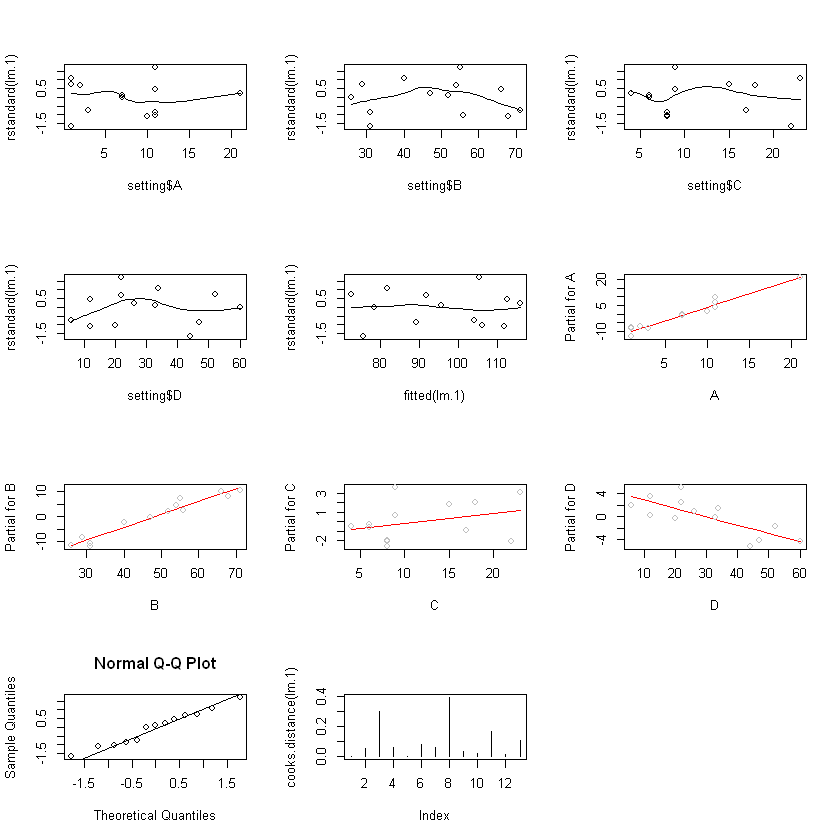

In [11]:
par(mfrow=c(4, 3))
scatter.smooth(rstandard(lm.1) ~ setting$A)
scatter.smooth(rstandard(lm.1) ~ setting$B)
scatter.smooth(rstandard(lm.1) ~ setting$C)
scatter.smooth(rstandard(lm.1) ~ setting$D)
scatter.smooth(rstandard(lm.1) ~ fitted(lm.1))
termplot(lm.1, partial.resid = TRUE, terms="A")
termplot(lm.1, partial.resid = TRUE, terms="B")
termplot(lm.1, partial.resid = TRUE, terms="C")
termplot(lm.1, partial.resid = TRUE, terms="D")
qqnorm(rstandard(lm.1))
qqline(rstandard(lm.1))
plot(cooks.distance(lm.1), type="h")